**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
# Write your code here
import numpy as np
from types import SimpleNamespace
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import minimize
import pandas as pd

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# We import our project from the py-file
from examproject import ProductionEconomyClass

# We import our class
economy = ProductionEconomyClass()

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [2]:
# Question 1
economy.check_market_clearing()

p1 = 0.1, p2 = 0.1
Labor Market Clearing: False
Good 1 Market Clearing: False
Good 2 Market Clearing: False
------------------------------
p1 = 0.1, p2 = 0.3
Labor Market Clearing: False
Good 1 Market Clearing: False
Good 2 Market Clearing: False
------------------------------
p1 = 0.1, p2 = 0.5
Labor Market Clearing: False
Good 1 Market Clearing: False
Good 2 Market Clearing: False
------------------------------
p1 = 0.1, p2 = 0.7
Labor Market Clearing: False
Good 1 Market Clearing: False
Good 2 Market Clearing: False
------------------------------
p1 = 0.1, p2 = 0.9
Labor Market Clearing: False
Good 1 Market Clearing: False
Good 2 Market Clearing: False
------------------------------
p1 = 0.1, p2 = 1.2
Labor Market Clearing: False
Good 1 Market Clearing: False
Good 2 Market Clearing: False
------------------------------
p1 = 0.1, p2 = 1.4
Labor Market Clearing: False
Good 1 Market Clearing: False
Good 2 Market Clearing: False
------------------------------
p1 = 0.1, p2 = 1.6
Labor Ma

**Answer:**

In the py.file we have started by initializing the class, hereby defining parameters, initialized placerholders for the prices and set the wage as numerarie. Following we have defined the optimal labor and production-function, defined the function for profit and utility as given above.

Above we see the check for market clearing, implying that supply meets demand for a set og prices in the defined range. We loop/iterate over possible combinations of prices for p1 and p2 within the range, where the optimal labor and production is calculated from these prices. The method we choose then check for market clearing in terms of labor and production, hereby meeting the conditions for market clearing as asked in the question. In our setup we check for market clearing at all three markets, labor and good 1 and 2, though we could have used Walras Law. Walras Law for market clearing implies, that if n-1 market in a economy clears, then the last market clears aswell. 


From the result printed above, we see that for all combination itterated over in the loop, none of the three markets meets the market clearing condition. This implies, that non of the increments in the interval defined above will imply an equilibrium. Though, this does not imply that the markets cannot clear, just that the onces tested above isn't the solution. Hereby, market clearing could be obtained either by changing the increments, the intervals etc.

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [3]:
# Question 2
economy.find_equilibrium_prices()

economy.consumption_without_tax()

Equilibrium prices: p1 = 1.10, p2 = 1.67
Consumption of c1 without tax: 0.48
Consumption of c2 without tax: 0.73


**Answer:**

Above we find that the prices that results in market clearing conditions being met are $p1=1.10$ and $p2=1.67$. From this we see, that the prices were within the range defined above, but simply wasn't tested as they weren't the "correct" intercrements within the interval.

From the equilibrium prices, we calculate the consumption in order to compare with the next question, when there is introduced a tax on carbon emission. 

We see from the Cob-Douglas utility function for the consumer, that the weight for good preference is given by $\alpha=0.3$. This implies that there is a greater weight on consumption for good 2, which is to be seen in the consumption of the two goods, where the consumption of c2 (without tax) is way higher than the consumption of c1 (without tax). Hereby the consumers preferences from their utility functions are reflected in their consumption in equilibrium.

Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [4]:
# Question 3
economy.find_optimal_tax()

Consumption of c1 with tax:   0.55
Consumption of c2 with tax:   0.66
Optimal tax rate:             0.47
Optimal lumpsum transfer:     0.31
Social welfare:              -0.64


In [5]:
#economy.find_optimal_prices_and_tax()
#economy.consumption_with_tax()

**Answer:**

In order to answer the question above, firstly, we assume that the economy is in equlibrium with the prices p1 and p2 above, yielding that the market clarings conditions are met. From this equilibrium, we shock the model by introducting two taxes, one being the tax on consumption of c2 in form of a carbon emission tax, and one being the lumpsum transfering back to the consumers.

From the social welfare function, we see that there is a negative externality attached to consumption of good 2, which 
implies that the social optimal consumption of c2 is lower than in the market equilibrium, as the markets price doesn't reflect the social cost.

We see above that the optimal tax rate for carbon emission $\tau=0.18$ and the lump-sum tax is 0.67. 
We find that the maximized SWF is 0.63. 
We calculate the consumption of the two goods after the carbon emission tax is being introduced and lump-sum transfered from the government to the consumers as well. 

First of, we see that the tax on carbon emission only affects the demand for c2, hereby implying that there is no carbon emission from c1. In practice, c2 are effected by the carbon tax by implying a higher effective price for the good. Before the price was simply p2, though after introducing the tax - the price is effectively given by $p2+\tau$. As $\tau>0$ we find a increase in the price for c2. This would lead to a lower demand for c2 relative to c1, which is exactly what we find when calculating the consumption of the two goods following the demand. Hereby there is a degree of possibility for subtitution, as we see that the consumers change their consumption towards c1. If the carbon tax were to increase, we would most likely find a even greater substitution towards c1.

We find that the lumpsum transfer is a direct compensation to the consumer funded by the tax revenue, as this is given by $T=\tau\times c2^*$. This transfer helps to redistribute income and possibly mitigate the negative effects of the tax on household consumption.

The optimal tax rate of 0.47 reflects a balance between raising enough revenue to fund transfers and not overburdening households to the point where their consumption and labor supply decisions significantly lower overall welfare. Where te lump-sum transfer is a crucial element, as it helps to alleviate the burden of the tax on households by returning some of the collected tax revenue, which supports their consumption and labor supply decisions.

The maximized SWF function yields a value of -0.63. This might be explained by the general social negative effect there is associated with the consumption of c2. Even though, a tax of $\tau=0.47$ is introduced, the social cost, reflecting the negative externality, is not high enough to compensate for the negative social cost associated with c2, therefore - the social welfare function is negative even though we set the optimal tax rate.

## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [6]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [7]:
# Import the CareerChoiceSimulation class
from examproject import CareerChoiceSimulation

# Create an instance of CareerChoiceSimulation
simulator = CareerChoiceSimulation()

In [8]:
# Question 1
# Perform simulation and get results
overall_expected_utilities, overall_avg_realized_utilities = simulator.simulate_utility()

# Print results
J = 3  # Number of career tracks

print("Overall Expected Utilities:")
for j in range(J):
    print(f"Career {j+1}: {overall_expected_utilities[j]}")

print("\nOverall Average Realized Utilities:")
for j in range(J):
    print(f"Career {j+1}: {overall_avg_realized_utilities[j]:.2f}")

Overall Expected Utilities:
Career 1: 1.0
Career 2: 2.0
Career 3: 3.0

Overall Average Realized Utilities:
Career 1: 0.99
Career 2: 2.00
Career 3: 2.99


**Answer:**

From the above results we observe that the overall average realized utilities are almost the same as the expected utilities. This means that the graduates are almost correct in their beliefs about their observed utility. This implies that the realized utilities are effected by some noise term, which the graduates do not take into account when making their expectations. On average though they are almost cancled out.

Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

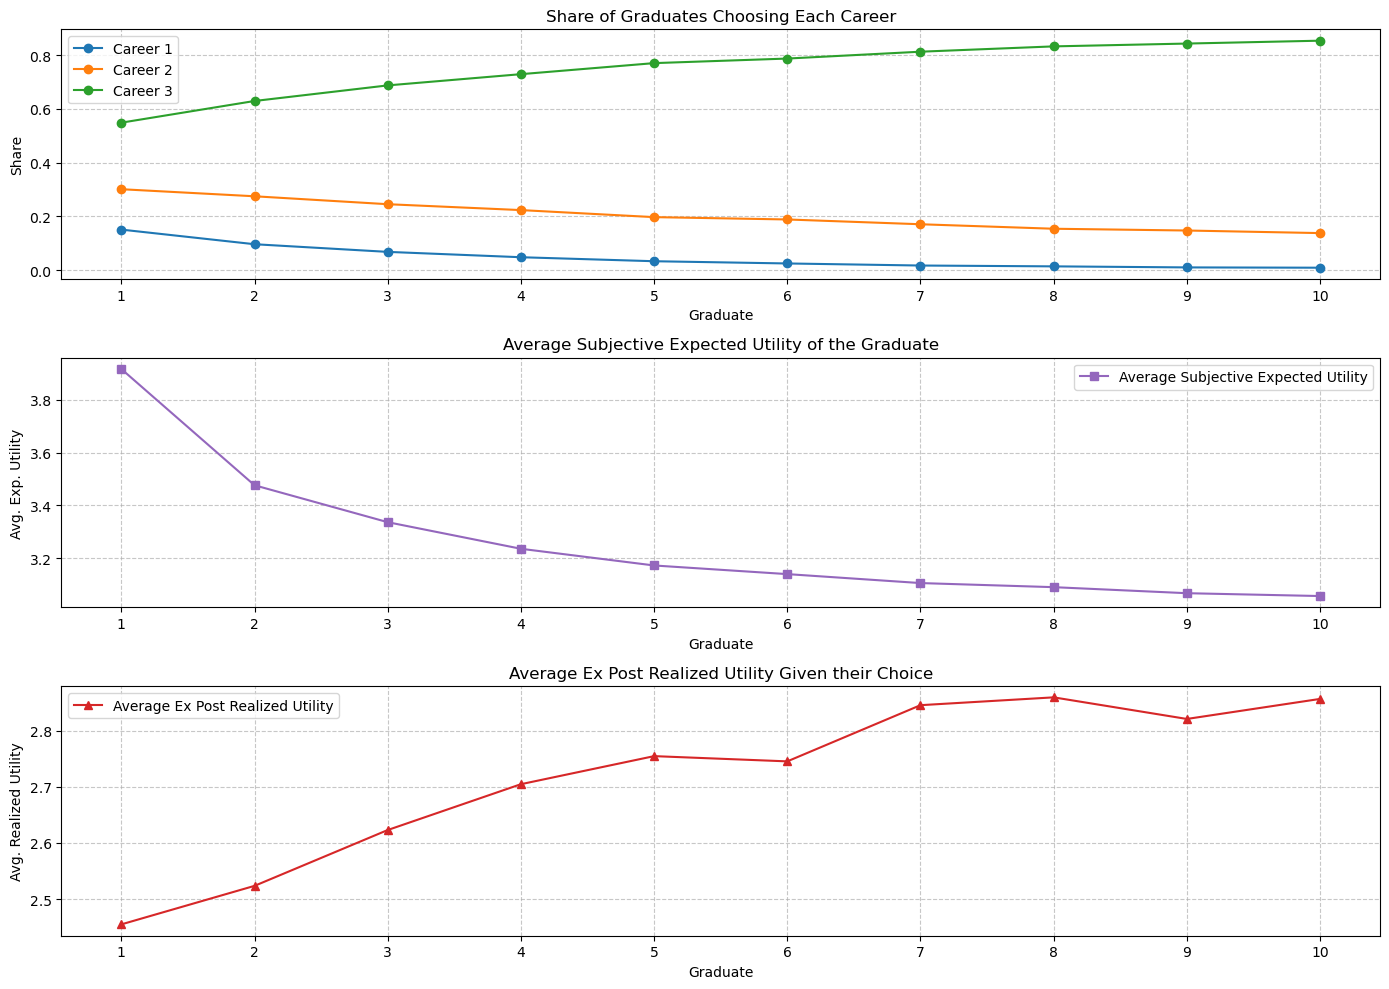

In [9]:
# Question 2
share_grad_choosing_career, ave_sub_exp_utility, ave_ex_post_real_utility = simulator.simulate_career_choices_prior()

# Visualize the results
plt.figure(figsize=(14, 10))

# Share of Graduates Choosing Each Career
plt.subplot(3, 1, 1)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Different color scheme
for idx, career in enumerate(range(1, simulator.par.J + 1)):
    plt.plot(share_grad_choosing_career.index, share_grad_choosing_career[career], label=f'Career {career}', color=colors[idx], marker='o', linestyle='-')
plt.title('Share of Graduates Choosing Each Career')
plt.xlabel('Graduate')
plt.ylabel('Share')
plt.xticks(np.arange(1, simulator.par.N + 1))  # Ensure all graduates are displayed on x-axis
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Average Subjective Expected Utility
plt.subplot(3, 1, 2)
plt.plot(ave_sub_exp_utility.index, ave_sub_exp_utility, label='Average Subjective Expected Utility', color='#9467bd', marker='s', linestyle='-')
plt.title('Average Subjective Expected Utility of the Graduate')
plt.xlabel('Graduate')
plt.ylabel('Avg. Exp. Utility')
plt.xticks(np.arange(1, simulator.par.N + 1))  # Ensure all graduates are displayed on x-axis
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Average Ex Post Realized Utility
plt.subplot(3, 1, 3)
plt.plot(ave_ex_post_real_utility.index, ave_ex_post_real_utility, label='Average Ex Post Realized Utility', color='#d62728', marker='^', linestyle='-')
plt.title('Average Ex Post Realized Utility Given their Choice')
plt.xlabel('Graduate')
plt.ylabel('Avg. Realized Utility')
plt.xticks(np.arange(1, simulator.par.N + 1))  # Ensure all graduates are displayed on x-axis
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Answer:**

In this question we do not know $v_j$ and therefore the graduates has to make a judgment about their expected utility on behalf of their friends average utility from their respective career. 
When looking at each type of graduate defined by the number of friends we observe that the share of graduates choosing career 3 increases with the number of friends to almost 85 pct. The opposite effect is the case when looking at career 1 and 2, where career 1 almost decreases to a share of 0 and career 2 decreases to a share around 15 pct. This implies that when having more friends to make judgments of own utility from the careers on the less errors will affect the graduates beliefs of their own expected utility. This means that they will choose the career where their friends gain the most utility from it. 

This is also shown in the next two graphs where the expected utility and the realized utility approaches each other the more friends the graduate has. At around 7-10 friends the average realized utility and the average expected utility differs very little. This shows us that the graduates are able to make somehow correct predictions about their own expected utility when having a lot of friends to base the judgment on.


After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

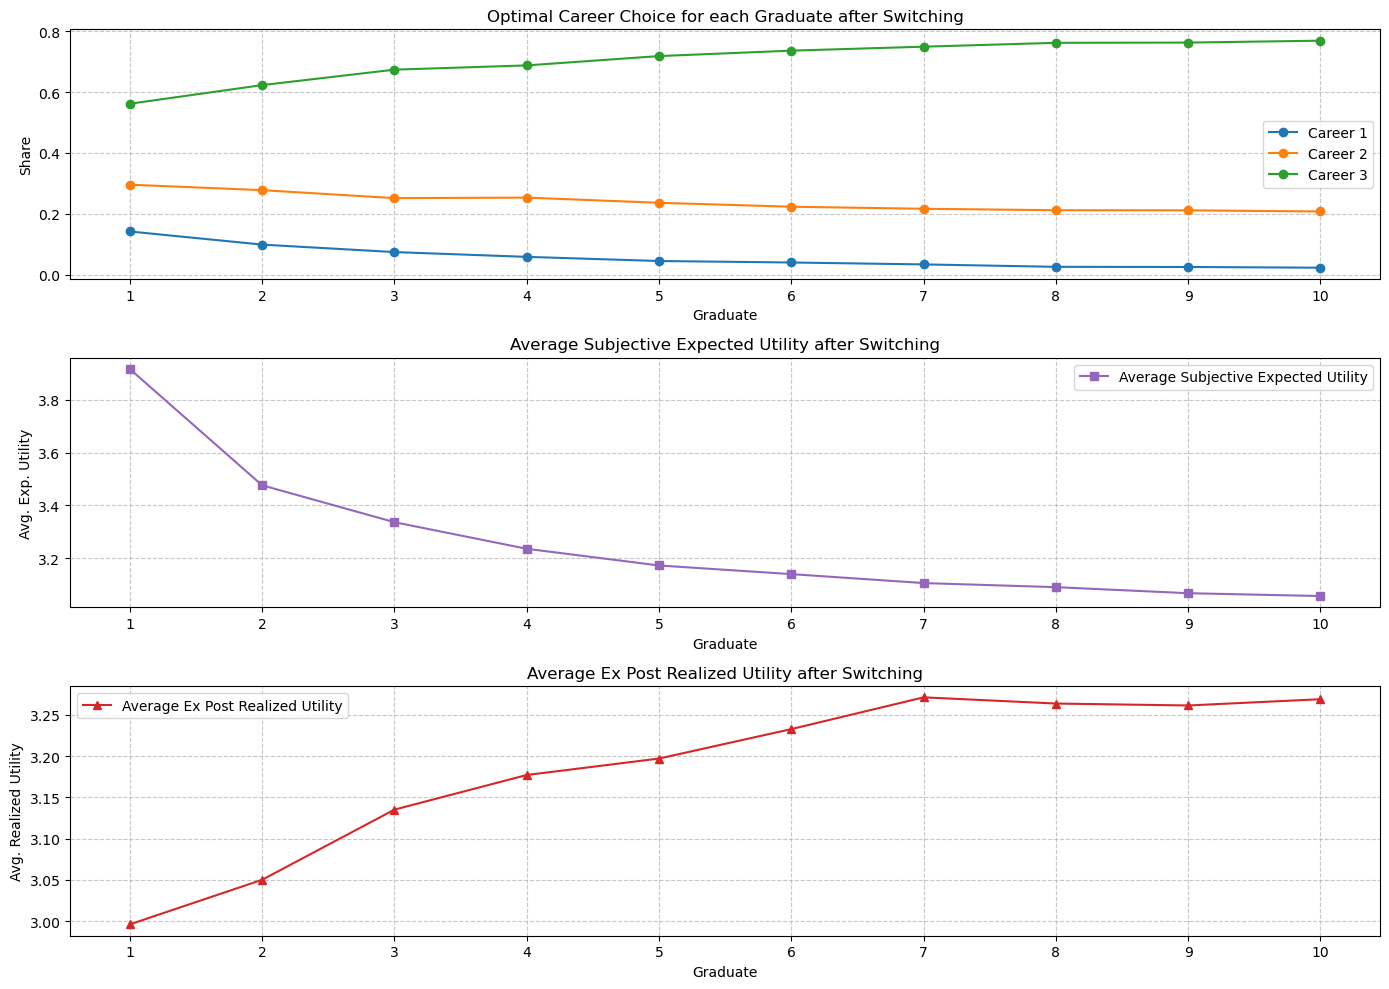

In [10]:
share_grad_switching, ave_sub_exp_utility_switching, ave_ex_post_real_utility_switching = simulator.simulate_career_choices_switching_stats()

# Visualize the results
plt.figure(figsize=(14, 10))

# Share of Graduates Choosing Each Career after Switching
plt.subplot(3, 1, 1)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
for idx, career in enumerate(range(1, simulator.par.J + 1)):
    plt.plot(share_grad_switching.index, share_grad_switching[career], label=f'Career {career}', color=colors[idx], marker='o', linestyle='-')
plt.title('Optimal Career Choice for each Graduate after Switching')
plt.xlabel('Graduate')
plt.ylabel('Share')
plt.xticks(np.arange(1, simulator.par.N + 1))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Average Subjective Expected Utility after Switching
plt.subplot(3, 1, 2)
plt.plot(ave_sub_exp_utility_switching.index, ave_sub_exp_utility_switching, label='Average Subjective Expected Utility', color='#9467bd', marker='s', linestyle='-')
plt.title('Average Subjective Expected Utility after Switching')
plt.xlabel('Graduate')
plt.ylabel('Avg. Exp. Utility')
plt.xticks(np.arange(1, simulator.par.N + 1))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Average Ex Post Realized Utility after Switching
plt.subplot(3, 1, 3)
plt.plot(ave_ex_post_real_utility_switching.index, ave_ex_post_real_utility_switching, label='Average Ex Post Realized Utility', color='#d62728', marker='^', linestyle='-')
plt.title('Average Ex Post Realized Utility after Switching')
plt.xlabel('Graduate')
plt.ylabel('Avg. Realized Utility')
plt.xticks(np.arange(1, simulator.par.N + 1))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

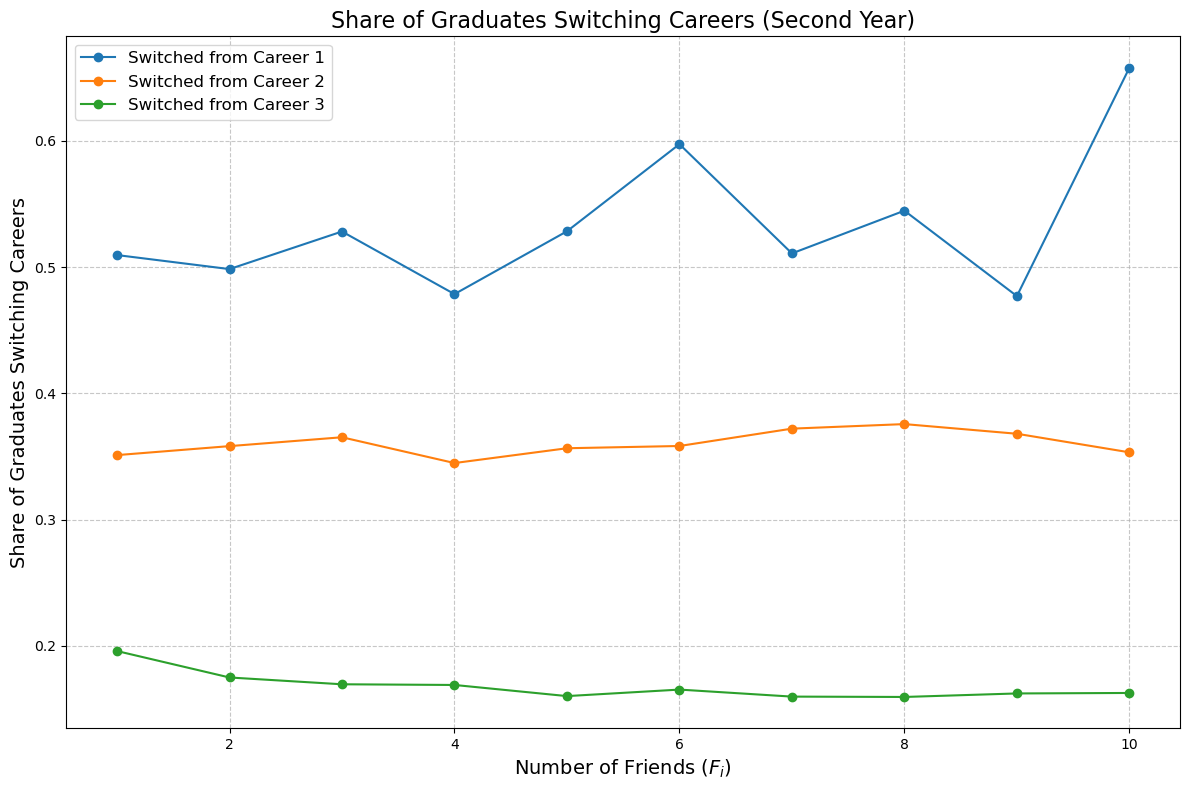

In [25]:

def simulate_career_choices(seed=7):
    """Simulate initial career choices for graduates based on expected utility."""
    np.random.seed(seed)
    results = []

    for k in range(par.K):
        epsilon_friends = {i: np.random.normal(0, par.sigma, (i, par.J)) for i in range(1, par.N + 1)}
        epsilon_personal = {i: np.random.normal(0, par.sigma, par.J) for i in range(1, par.N + 1)}

        for i in range(1, par.N + 1):
            # Calculate prior expected utilities
            prior_exp_utilities = par.v + np.mean(epsilon_friends[i], axis=0)

            # Determine the career choice with the highest expected utility
            chosen_career = np.argmax(prior_exp_utilities) + 1

            # Calculate the realized utility
            realized_utility = par.v[chosen_career - 1] + epsilon_personal[i][chosen_career - 1]

            results.append({
                'Graduate': i,
                'Chosen Career': chosen_career,
                'Prior Expected Utility': prior_exp_utilities[chosen_career - 1],
                'Realized Utility': realized_utility
            })

    return pd.DataFrame(results)

def simulate_career_choices_switching(seed=7):
    """Simulate career choices with the possibility of switching based on realized utility."""
    np.random.seed(seed)
    initial_results = simulate_career_choices(seed)
    results_with_switching = []

    for k in range(par.K):
        epsilon_friends = {i: np.random.normal(0, par.sigma, (i, par.J)) for i in range(1, par.N + 1)}
        epsilon_personal = {i: np.random.normal(0, par.sigma, par.J) for i in range(1, par.N + 1)}

        for i in range(1, par.N + 1):
            # Calculate prior expected utilities
            prior_exp_utilities = par.v + np.mean(epsilon_friends[i], axis=0)

            # Determine the career choice with the highest expected utility
            chosen_career = np.argmax(prior_exp_utilities) + 1

            # Calculate the realized utility
            realized_utility = par.v[chosen_career - 1] + epsilon_personal[i][chosen_career - 1]

            # Reconsider career choice after learning the realized utility
            new_prior_exp_utilities = prior_exp_utilities - par.c
            new_prior_exp_utilities[chosen_career - 1] = realized_utility

            new_chosen_career = np.argmax(new_prior_exp_utilities) + 1
            new_realized_utility = par.v[new_chosen_career - 1] + epsilon_personal[i][new_chosen_career - 1]

            results_with_switching.append({
                'Graduate': i,
                'Initial Chosen Career': chosen_career,
                'Initial Realized Utility': realized_utility,
                'New Chosen Career': new_chosen_career,
                'New Realized Utility': new_realized_utility,
                'Prior Expected Utility': prior_exp_utilities[chosen_career - 1],
                'Switched': chosen_career != new_chosen_career
            })

    return pd.DataFrame(results_with_switching)

# Perform the simulation with switching
results_with_switching_df = simulate_career_choices_switching()

# Calculate the share of graduates that switch careers based on their initial career choice
switching_stats = results_with_switching_df.groupby('Initial Chosen Career')['Switched'].mean()

# Calculate the share of graduates switching from each initial career choice
switching_shares = results_with_switching_df.groupby(['Graduate', 'Initial Chosen Career'])['Switched'].mean().unstack()

# Plotting the results with enhanced readability
plt.figure(figsize=(12, 8))

# Plot the share of graduates switching from each initial career
for career in range(1, par.J + 1):
    plt.plot(switching_shares.index, switching_shares[career], marker='o', label=f'Switched from Career {career}')

# Add titles and labels with increased font sizes
plt.title('Share of Graduates Switching Careers (Second Year)', fontsize=16)
plt.xlabel('Number of Friends $(F_i)$', fontsize=14)
plt.ylabel('Share of Graduates Switching Careers', fontsize=14)

# Add a legend with a larger font size
plt.legend(fontsize=12)

# Add a grid with improved styling
plt.grid(True, linestyle='--', alpha=0.7)

# Add tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


**Answer:**

When the graduates are able to change their career after one year we observe a slight change in the shares and utility. The pattern is though the same: the share of graduates in career 3 still increases by number of friends, and decreases in career 1 and 2 by the number of friends. Though the decrease is smaller for career 2 and the increase is smaller for career 3. 

Looking at the utility we actually observe that the average realized utility actually increases a lot and ends up being larger than the average expected utility. This implies that the graduates actually underestimate their own utility from changing career based on the utility from their friends. This implies that the friends utility might not represent the utility the graduate gains from changing career. This could be due to the fact that the gain in utility is now relative to what have been observed before, which can make the gain in utility seem even larger if the graduate was unhappy about their previous career.  

Above we have also printed the share of graduates switching careers, based on what career they are switching from. In line with the observed utility from the three careers, most graduates choose to switch career if they where originally in career 1, where also a positive trend is observed for the number of friends. The second most people switch from career 2, which seems to not really have a trend. The least people switch from career 3, which has a negative trend depending on number of friends. 

All in all this implies that the more friends the graduate have, and thereby the more observation you can make judgment on behalf of, the more correct will your expectations be.

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [12]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))


**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

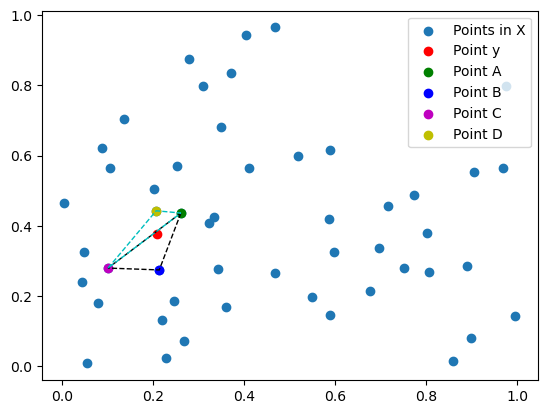

In [13]:
## Problem 3: Barycentric Interpolation

# Import the class
from examproject import BarycentricInterpolation

# Create an instance of the class
barycentric = BarycentricInterpolation()

## Question 1 

# Generate random points X in the unit square
rng = np.random.default_rng(2024)
X = rng.uniform(size=(50, 2))

# Generate a random point y
y = rng.uniform(size=(2,))

# Find A, B, C, and D
A, B, C, D = barycentric.closest_points_in_quadrants(X, y)

# Plot the points and triangles
barycentric.plot_points_and_triangles(X, y, A, B, C, D)

Based on the assignment equations and the samples given, we have computed the four points and plotted them as triangles with the point y and X. From looking at the plot, y is clearly within the area of the computed points, however it is not completely clear if it lies on the line between the triangles, or within the lower one. This is computed in question 2. 

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [14]:
## Question 2
# Compute barycentric coordinates and check triangles
results = barycentric.compute_barycentric_and_check(y, A, B, C, D)

# Print the results
print("Barycentric coordinates with respect to ABC:", results["barycentric_ABC"])
print("Barycentric coordinates with respect to CDA:", results["barycentric_CDA"])
print("Is y inside triangle ABC?", results["inside_ABC"])
print("Is y inside triangle CDA?", results["inside_CDA"])

Barycentric coordinates with respect to ABC: (0.63, 0.07, 0.3)
Barycentric coordinates with respect to CDA: (0.37, -0.13, 0.77)
Is y inside triangle ABC? True
Is y inside triangle CDA? False


Now, from computing the barycentric coordinates wrt. the two triangles, we see that y lies within the ABC triangle. 

Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [15]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [16]:
## Question 3
# Compute and compare function values
results_compare = barycentric.compute_and_compare(y, X)

# Print the results of the function comparison
print("Approximated f(y):", results_compare["approximated_f_y"])
print("True f(y):", results_compare["true_f_y"])

Approximated f(y): 0.08
True f(y): 0.08


From approximating the value of f(y), we see that using interpolation we arrive relatively close to the true value - a difference of cirka 0.0051. 

**Question 4:** Repeat question 3 for all points in the set $Y$.

In [17]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

In [18]:
## Question 4

# Compute and compare function values for all points in Y
results_multiple = barycentric.compute_and_compare_multiple_Y(X)

# Print the results
print("Approximated and true function values for all points in Y:")
for result in results_multiple:
    print(f"Point {result['point']}: Approximated f(y) = {result['approximated_f_y']}, True f(y) = {result['true_f_y']}")


Approximated and true function values for all points in Y:
Point (0.2, 0.2): Approximated f(y) = 0.04, True f(y) = 0.04
Point (0.8, 0.2): Approximated f(y) = 0.16, True f(y) = 0.16
Point (0.8, 0.8): Approximated f(y) = nan, True f(y) = 0.64
Point (0.8, 0.2): Approximated f(y) = 0.16, True f(y) = 0.16
Point (0.5, 0.5): Approximated f(y) = 0.25, True f(y) = 0.25


Now, when computing the approximated values of the function for all values of Y, all but one point is approximately close to the true value. 

For the point (0.8, 0.8) we see that interpolating returns NaN. This implies that the points are not found correctly, why we compute the closest points for this value of y below. 

In [19]:
# Now, compute closest points for (0.8, 0.8)
y_specific = (0.8, 0.8)
A, B, C, D = barycentric.closest_points_in_quadrants(X, y_specific)
print(f"\nClosest points to {y_specific}:")
print(f"A={A}")
print(f"B={B}")
print(f"C={C}")
print(f"D={D}")


Closest points to (0.8, 0.8):
A=nan
B=[0.9756222  0.79942844]
C=[0.58875932 0.61680751]
D=[0.46801905 0.96493021]


We see that it returns NaN for the point A for (0.8, 0.8). We expect the explanation to be, if there are no points in X that satisfy the condition for quadrant A.

To get a visual look of this, we plot the point y=(0.8, 0.8) and the points (except A which is NaN). 

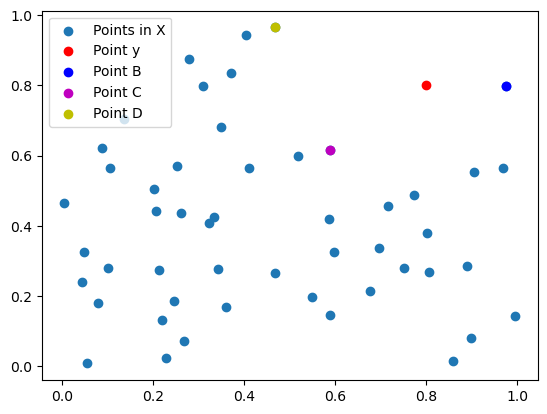

In [20]:
barycentric.plot_y_specific(X, y_specific, A, B, C, D)

From the plot we see that there isn't a point in the top-right quadrant from y=(0.8, 0.8), which is why A returns as NaN. This implies that y won't be inside either triangle, such that interpolation won't work.